In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.manifold import TSNE

/Users/leejungjae/opt/anaconda3/envs/kr2_2_4tf1_13_1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/leejungjae/opt/anaconda3/envs/kr2_2_4tf1_13_1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/leejungjae/opt/anaconda3/envs/kr2_2_4tf1_13_1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [2]:
(x_train, y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [3]:
# Define our own plot function
def scatter(x, labels, num_of_labels, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_of_labels))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    
    
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    # 그래프 규격선, 여백공간 제거
    ax.axis('off') 
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num_of_labels):
        # Add Label with txt type on plotting image
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.savefig(subtitle)

before shape :  (10000, 28, 28)
after flat shape :  (10000, 784)
(10000, 2)


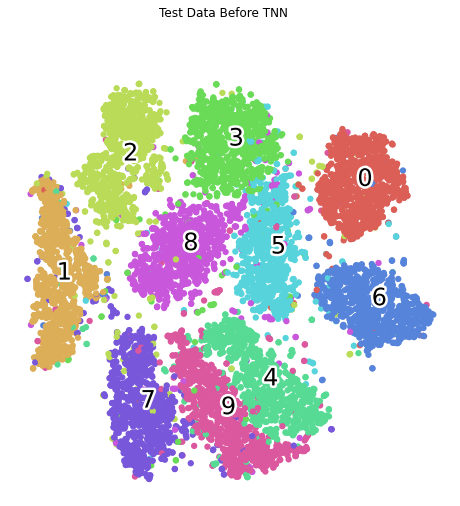

In [4]:
img_row=28
img_column=28
img_channel=1
print("before shape : ",x_test.shape)
x_test_flat = x_test.reshape(-1,img_row*img_column*img_channel)
print("after flat shape : ",x_test_flat.shape)
tsne = TSNE()
test_tsne_embeds = tsne.fit_transform(x_test_flat)
print(test_tsne_embeds.shape)
scatter(test_tsne_embeds, y_test, 10, "Test Data Before TNN")